In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif

In [2]:
%config IPCpmpleter.greedy=True

In [3]:
train = pd.read_csv('Data Mining VU data/training_set_VU_DM_2014.csv')

In [15]:
test = pd.read_csv('Data Mining VU data/test_set_VU_DM_2014.csv')

In [10]:
# smaller samples for faster exploration
train_sample = train.sample(frac=0.1, random_state=0)
test_sample = train.drop(train_sample.index)

In [38]:
train_sample.booking_bool.sum()/train_sample.shape[0]

0.027797161473942532

In [39]:
train.booking_bool.sum()/train.shape[0]

0.027910511305481445

In [13]:
train.click_bool.sum()/train.shape[0]

0.04474858254172207

In [4]:
train.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [3]:
train[['prop_location_score1','prop_location_score2']].describe()

,prop_location_score1,prop_location_score2
count,4.958347e+06,3.867999e+06
mean,2.872589e+00,1.303852e-01
std,1.531011e+00,1.594634e-01
min,0.000000e+00,0.000000e+00
25%,1.790000e+00,1.900000e-02
50%,2.770000e+00,6.900000e-02
75%,4.040000e+00,1.805000e-01
max,6.980000e+00,1.000000e+00


In [63]:
len(train.position.unique())

40

In [67]:
# number of different users
print(len(train.srch_id.unique()), len(test.srch_id.unique()))

199795 199549


In [68]:
# numbers of different hotels
print(len(test.prop_id.unique()), len(test.prop_id.unique()))

129438 129438


In [14]:
# check if test set contains other hotels than the training set
test_ids = set(test.prop_id.unique())
train_ids = set(train.prop_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' hotels in the test set overlap with the training set')

121665  of  129438  hotels in the test set overlap with the training set


In [13]:
# check if test set contains other users than the training set
test_ids = set(test.srch_id.unique())
train_ids = set(train.srch_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' users in the test set overlap with the training set')

119914  of  199549  users in the test set overlap with the training set


In [60]:
# check if test set contains other site_ids than the training set
test_ids = set(test.site_id.unique())
train_ids = set(train.site_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' site_ids in the test set overlap with the training set')

34  of  34  site_ids in the test set overlap with the training set


In [61]:
# check if test set contains other visitor_location_country_ids than the training set
test_ids = set(test.visitor_location_country_id.unique())
train_ids = set(train.visitor_location_country_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' countries in the test set overlap with the training set')

202  of  210  countries in the test set overlap with the training set


In [3]:
numerical_features = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']

In [5]:
train.isna().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [6]:
train.isna().sum()/train.shape[0]

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.949204
visitor_hist_adr_usd           0.948977
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.001485
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.219902
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.935986


In [6]:
# for booked hotels the ratio of missing values for hotel properties (prop_review_score, prop_location_score2) is significantly lower
# --> replace missing hotel properties by 'bad' values
train[train.booking_bool==1].isna().sum()/train[train.booking_bool==1].shape[0]

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.934331
visitor_hist_adr_usd           0.933998
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.000838
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.104588
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.921345


# Distributions

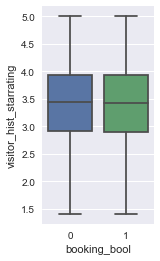

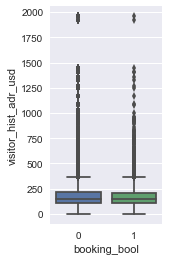

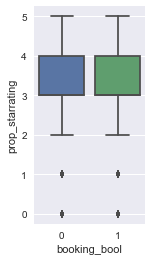

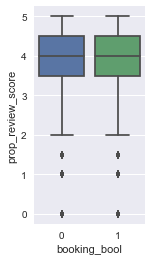

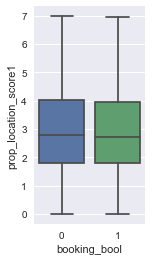

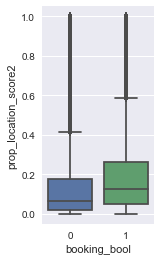

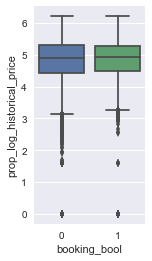

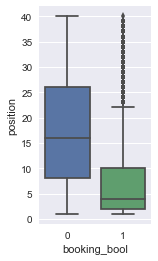

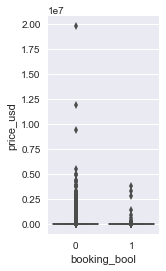

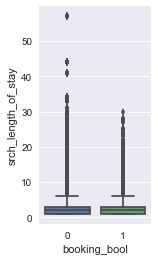

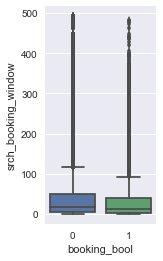

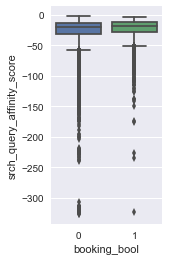

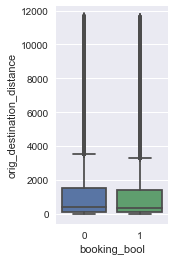

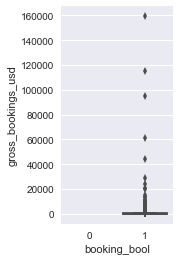

In [93]:
for feature in ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','srch_length_of_stay','srch_booking_window','srch_query_affinity_score','orig_destination_distance','gross_bookings_usd']:
    plt.figure(figsize=(2,4))
    sns.boxplot(x='booking_bool', y=feature, data=train)
    plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


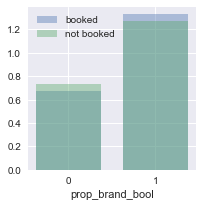

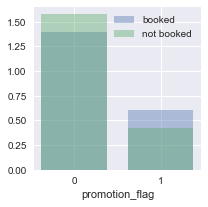

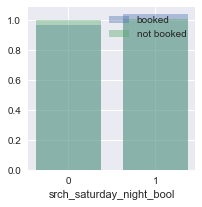

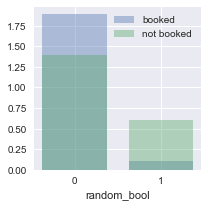

In [91]:
sns.set(style="darkgrid")
for feature in ['prop_brand_bool','promotion_flag','srch_saturday_night_bool','random_bool']:
    plt.figure(figsize=(3,3))
    ax1 = sns.distplot(train[feature][train.booking_bool==1], label='booked', kde=False, norm_hist=True, bins=len(train[feature].unique()), hist_kws={"rwidth":0.75})
    ax2 = sns.distplot(train[feature][train.booking_bool==0], label='not booked', kde=False, norm_hist=True, bins=len(train[feature].unique()), hist_kws={"rwidth":0.75})
    plt.xticks([0.25,0.75],[0,1])
    #ax2.set_xticks([0.25,0.75],[0,1])
    plt.legend()
    plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


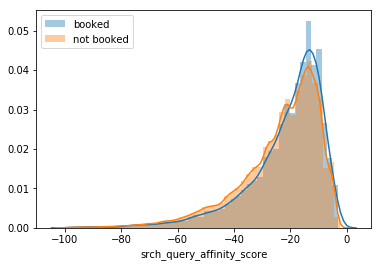

In [58]:
#sns.boxplot(x=train_sample.booking_bool[train_sample.srch_query_affinity_score <0], y=train_sample.srch_query_affinity_score[train_sample.srch_query_affinity_score <0])
sns.distplot(train.srch_query_affinity_score[train.booking_bool==1][train.srch_query_affinity_score>-100].dropna(), label='booked')
sns.distplot(train.srch_query_affinity_score[train.booking_bool==0][train.srch_query_affinity_score>-100].dropna(), label='not booked')
plt.legend()
plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


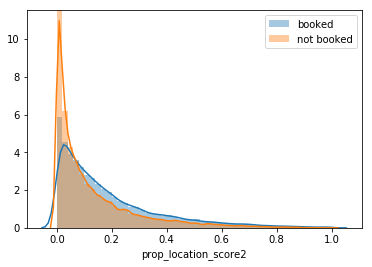

In [59]:
sns.distplot(train.prop_location_score2[train.booking_bool==1].dropna(), label='booked')
sns.distplot(train.prop_location_score2[train.booking_bool==0].dropna(), label='not booked')
plt.legend()
plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


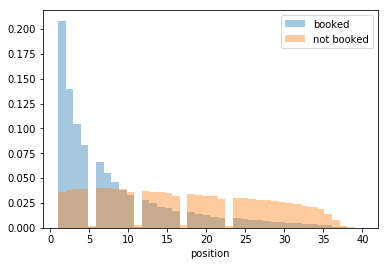

In [67]:
sns.distplot(train.position[train.booking_bool==1].dropna(), label='booked', bins=40, kde=False, norm_hist=True)
sns.distplot(train.position[train.booking_bool==0].dropna(), label='not booked', bins=40, kde=False, norm_hist=True)
plt.legend()
plt.show()

# Correlations 

### All instances 

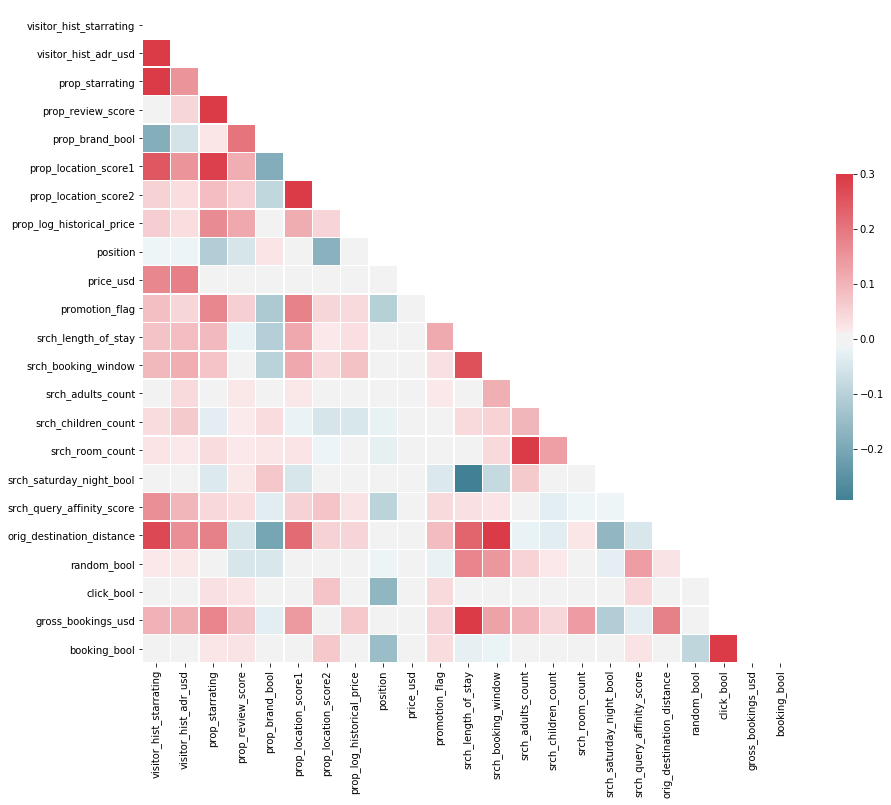

In [7]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','click_bool','gross_bookings_usd','booking_bool']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Booked instances only

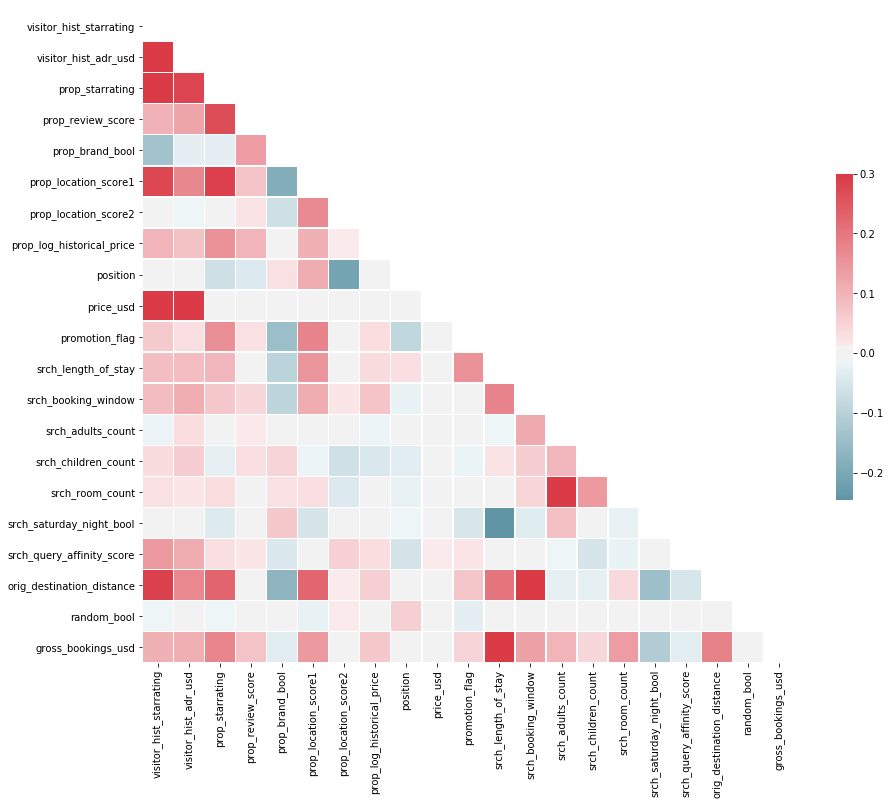

In [85]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[train.booking_bool==1][numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Only instances without booking 

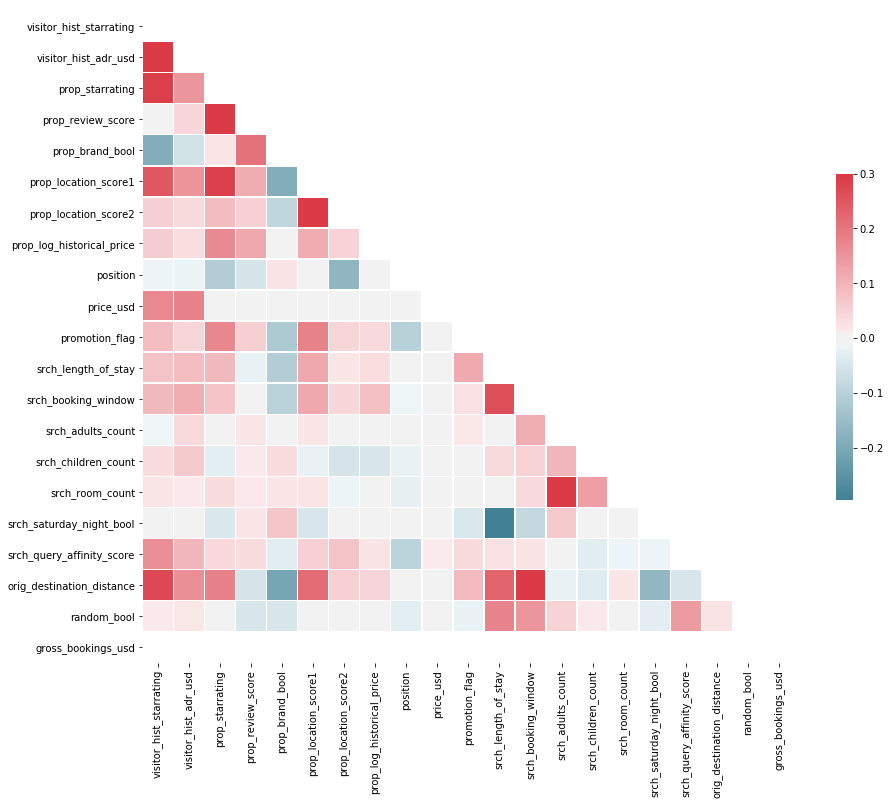

In [88]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[train.booking_bool==0][numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Difference in correlations between booked and not booked 

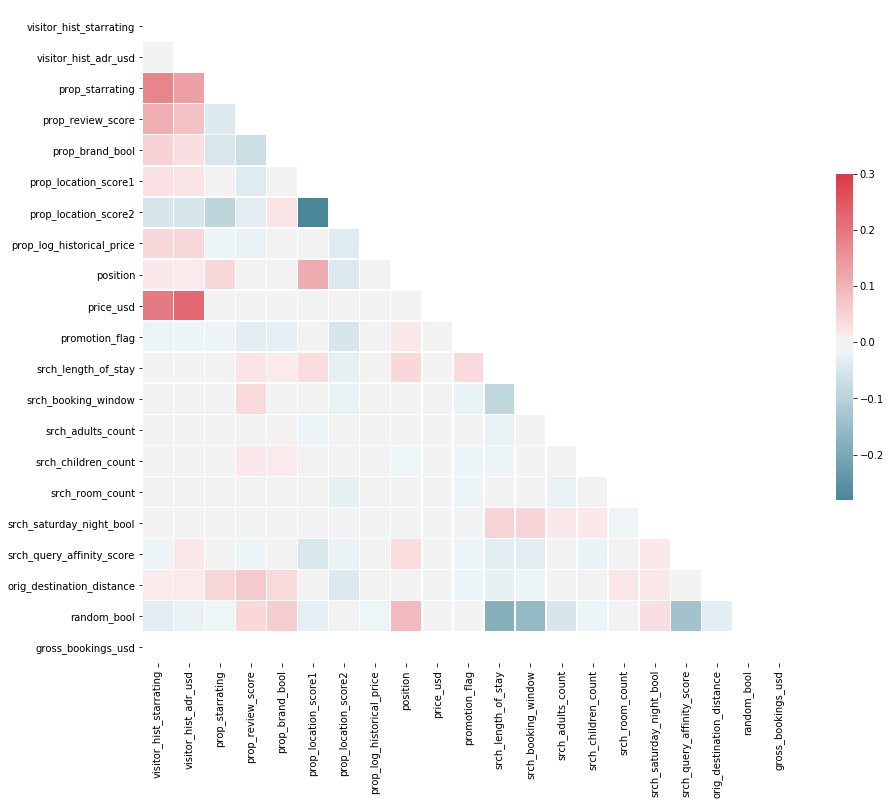

In [87]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr1 = train[train.booking_bool==1][numerical_data_of_interest].corr()
corr2 = train[train.booking_bool==0][numerical_data_of_interest].corr()
corr = corr1-corr2

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [76]:
train[['promotion_flag','booking_bool']].groupby(['promotion_flag'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,promotion_flag,booking_bool
1,1,0.039235
0,0,0.024797


In [77]:
train[['promotion_flag','click_bool']].groupby(['promotion_flag'], as_index=False).mean().sort_values(by='click_bool',ascending=False)

,promotion_flag,click_bool
1,1,0.060301
0,0,0.040473


In [5]:
train[['prop_brand_bool','booking_bool']].groupby(['prop_brand_bool'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,prop_brand_bool,booking_bool
1,1,0.029159
0,0,0.025741


In [6]:
train[['prop_brand_bool','click_bool']].groupby(['prop_brand_bool'], as_index=False).mean().sort_values(by='click_bool',ascending=False)

,prop_brand_bool,click_bool
1,1,0.044884
0,0,0.044513


In [9]:
train[['booking_bool','click_bool','promotion_flag','prop_brand_bool']].corr()

,booking_bool,click_bool,promotion_flag,prop_brand_bool
booking_bool,1.000000,0.782889,0.036047,0.009991
click_bool,0.782889,1.000000,0.039440,0.000866
promotion_flag,0.036047,0.039440,1.000000,-0.118841
prop_brand_bool,0.009991,0.000866,-0.118841,1.000000


In [19]:
# what features might be used to model 'position'?
train[['position','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score2','promotion_flag','srch_query_affinity_score']].corr()

,position,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score2,promotion_flag,srch_query_affinity_score
position,1.000000,-0.107717,-0.053983,0.023419,-0.174955,-0.103621,-0.094887
prop_starrating,-0.107717,1.000000,0.306454,0.021329,0.086325,0.173732,0.041781
prop_review_score,-0.053983,0.306454,1.000000,0.203949,0.055063,0.057970,0.035633
prop_brand_bool,0.023419,0.021329,0.203949,1.000000,-0.085203,-0.118841,-0.034613
prop_location_score2,-0.174955,0.086325,0.055063,-0.085203,1.000000,0.045440,0.075046
promotion_flag,-0.103621,0.173732,0.057970,-0.118841,0.045440,1.000000,0.038488
srch_query_affinity_score,-0.094887,0.041781,0.035633,-0.034613,0.075046,0.038488,1.000000


In [84]:
train[train.booking_bool==1][['position','prop_location_score1']].corr()

,position,prop_location_score1
position,1.000000,0.114018
prop_location_score1,0.114018,1.000000


In [10]:
train[train.booking_bool==1][['position','prop_location_score2']].corr()

,position,prop_location_score2
position,1.000000,-0.209136
prop_location_score2,-0.209136,1.000000


In [6]:
train[['booking_bool','prop_id']].groupby(['prop_id'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,prop_id,booking_bool
115035,125451,1.0
14783,16052,1.0
87447,95374,1.0
87440,95366,1.0
68591,74748,1.0
87362,95278,1.0
40191,43764,1.0
114802,125197,1.0
125888,137314,1.0
80521,87784,1.0


In [7]:
train[['site_id','price_usd']].groupby(['site_id'], as_index=False).mean().sort_values(by='price_usd',ascending=False)

,site_id,price_usd
25,26,909.176225
14,15,420.221795
33,34,275.636706
4,5,269.044141
31,32,268.459679
11,12,263.577263
27,28,186.302246
22,23,185.730583
13,14,184.203234
3,4,179.449536


In [7]:
avg_price_per_site = train[['site_id','price_usd']][train.booking_bool==1].groupby(['site_id'], as_index=False).mean().sort_values(by='price_usd',ascending=False)

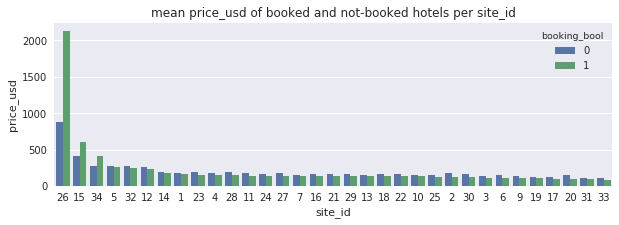

In [7]:
#avg_price_per_site.plot.bar(x='site_id',y='price_usd', figsize=(8,3), legend=None, grid='on')
sns.set()
#sns.set_style("whitegrid")
plt.figure(figsize=(10,3))
sns.barplot(x='site_id', y='price_usd', hue='booking_bool', order=avg_price_per_site.site_id, data=train[['site_id','price_usd','booking_bool']], ci=None)
plt.ylabel('price_usd')
plt.title('mean price_usd of booked and not-booked hotels per site_id')
plt.show()

In [4]:
avg_review_per_site = train[['site_id','prop_review_score']][train.booking_bool==1].groupby(['site_id'], as_index=False).mean().sort_values(by='prop_review_score',ascending=False)

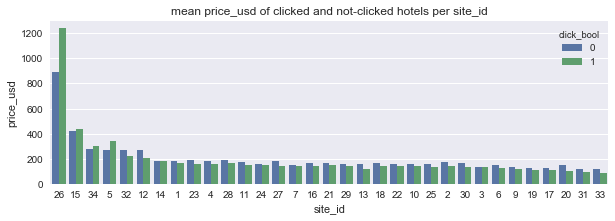

In [8]:
sns.set()
plt.figure(figsize=(10,3))
sns.barplot(x='site_id', y='price_usd', hue='click_bool', order=avg_price_per_site.site_id, data=train[['site_id','price_usd','click_bool','booking_bool']], ci=None)
plt.ylabel('price_usd')
plt.title('mean price_usd of clicked and not-clicked hotels per site_id')
plt.show()

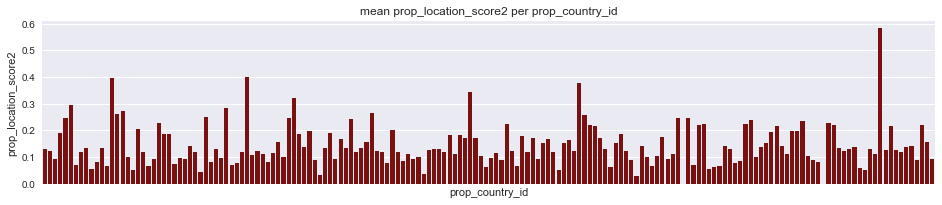

In [11]:
sns.set()
plt.figure(figsize=(16,3))
sns.barplot(x='prop_country_id', y='prop_location_score2', data=train[['prop_country_id','prop_location_score2']], ci=None, color='darkred')
plt.ylabel('prop_location_score2')
plt.xticks([])
plt.title('mean prop_location_score2 per prop_country_id')
plt.show()

In [96]:
train[['visitor_location_country_id','prop_location_score2']].groupby(['visitor_location_country_id'], as_index=False).mean().std()

visitor_location_country_id    67.633302
prop_location_score2            0.061563
dtype: float64

In [97]:
train[['srch_destination_id','prop_location_score2']].groupby(['srch_destination_id'], as_index=False).mean().std()

srch_destination_id     8222.365409
prop_location_score2       0.219969
dtype: float64

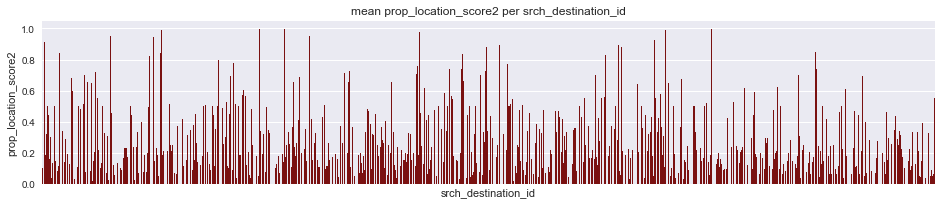

In [12]:
sns.set()
plt.figure(figsize=(16,3))
sns.barplot(x='srch_destination_id', y='prop_location_score2', data=train[['srch_destination_id','prop_location_score2']], ci=None, color='darkred')
plt.ylabel('prop_location_score2')
plt.xticks([])
plt.title('mean prop_location_score2 per srch_destination_id')
plt.show()

In [15]:
train['star_diff'] = np.abs(train.visitor_hist_starrating - train.prop_starrating)

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'booking_bool = 1')

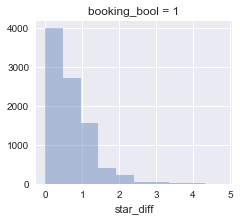

In [31]:
sns.set()
plt.figure(figsize=(3.5,3))
sns.distplot(train.star_diff[train.booking_bool == 1].dropna(), kde=False, bins=10)
plt.title('booking_bool = 1')

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'click_bool = 1')

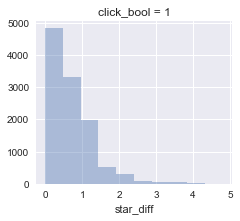

In [32]:
sns.set()
plt.figure(figsize=(3.5,3))
sns.distplot(train.star_diff[train.click_bool == 1].dropna(), kde=False, bins=10)
plt.title('click_bool = 1')

In [46]:
train['star_diff_bins'] = pd.cut(train.star_diff, 5)
train[['star_diff_bins','booking_bool']].groupby(['star_diff_bins'], as_index=False).mean().sort_values(by='star_diff_bins',ascending=True)

,star_diff_bins,booking_bool
0,"(-0.005, 1.0]",0.040379
1,"(1.0, 2.0]",0.024990
2,"(2.0, 3.0]",0.016264
3,"(3.0, 4.0]",0.016580
4,"(4.0, 5.0]",0.018111


In [35]:
train['price_diff'] = np.abs(train.visitor_hist_adr_usd - train.price_usd)

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'booking_bool = 1')

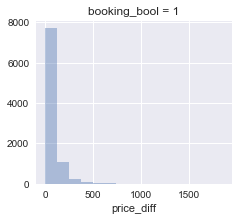

In [37]:
sns.set()
plt.figure(figsize=(3.5,3))
sns.distplot(train.price_diff[train.booking_bool == 1].dropna(), kde=False, bins=15)
plt.title('booking_bool = 1')

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'click_bool = 1')

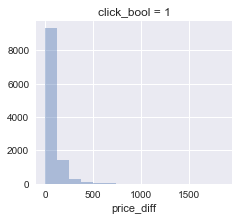

In [39]:
sns.set()
plt.figure(figsize=(3.5,3))
sns.distplot(train.price_diff[train.click_bool == 1].dropna(), kde=False, bins=15)
plt.title('click_bool = 1')

In [42]:
train['price_diff_bins'] = pd.qcut(train['price_diff'], 4)
train[['price_diff_bins','booking_bool']].groupby(['price_diff_bins'], as_index=False).mean().sort_values(by='price_diff_bins',ascending=True)

,price_diff_bins,booking_bool
0,"(-0.001, 27.17]",0.048726
1,"(27.17, 60.72]",0.039163
2,"(60.72, 116.43]",0.031607
3,"(116.43, 12787.11]",0.024920


In [92]:
train[['prop_starrating','booking_bool']].groupby(['prop_starrating'], as_index=False).mean().sort_values(by='prop_starrating',ascending=False)

,prop_starrating,booking_bool
5,5,0.025915
4,4,0.033223
3,3,0.028090
2,2,0.021844
1,1,0.013314
0,0,0.016506


Text(0.5,1,'average visitor_hist_starrating per site_id')

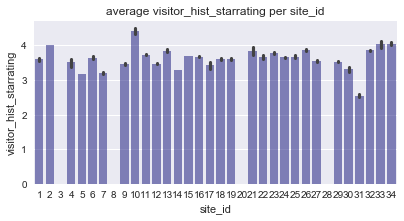

In [54]:
plt.figure(figsize=(6.5,3))
sns.barplot(x='site_id', y='visitor_hist_starrating', data=train[['site_id','visitor_hist_starrating','booking_bool']], color='darkblue', alpha=0.5)
plt.title('average visitor_hist_starrating per site_id')

Text(0.5,1,'average visitor_hist_adr_usd per site_id')

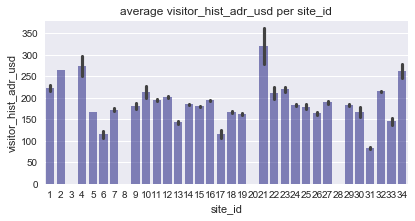

In [53]:
plt.figure(figsize=(6.5,3))
sns.barplot(x='site_id', y='visitor_hist_adr_usd', data=train[['site_id','visitor_hist_adr_usd','booking_bool']], color='darkblue', alpha=0.5)
plt.title('average visitor_hist_adr_usd per site_id')

In [64]:
def normalize_feature(df, feature_name, normalize_wrt_feature):
    groups = df.groupby(normalize_wrt_feature)
    avg_feature_vals = groups.apply(lambda x: x[feature_name].mean())
    new_col = []
    for row in train.itertuples():
        new_col.append(getattr(row, feature_name) / avg_feature_vals[getattr(row, normalize_wrt_feature)])
    df[feature_name + '_norm_' + normalize_wrt_feature] = new_col

In [65]:
srch_id_groups = train.groupby('srch_id')
#for f in numerical_features:
avg_prop_starrating_per_srch_id = srch_id_groups.apply(lambda x: x.prop_starrating.mean())

In [ ]:
avg_prop_starrating_per_srch_id
new_col = []
for row in train.itertuples():
    new_col.append(row.prop_starrating / avg_prop_starrating_per_srch_id[row.srch_id]) # getattr(row, 'srch_id')

In [ ]:
train['prop_starrating_norm_srch_id'] = new_col
train.prop_starrating_norm_srch_id

In [ ]:
normalize_feature(train, 'prop_starrating', 'srch_id')

In [1]:
sns.set()
sns.distplot(train.prop_starrating_norm_srch_id.dropna().apply(lambda x: x if x <=5 else 5))

NameError: name 'sns' is not defined

/home/fiona/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


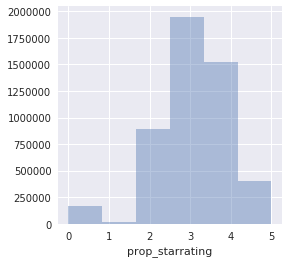

In [10]:
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(train.prop_starrating.dropna(), bins=6, kde=False)

In [11]:
#sns.set()
sns.set_style("whitegrid")
sns.distplot(train.prop_starrating_norm_srch_id[train.booking_bool==1].dropna().apply(lambda x: x if x <=5 else 5), label='booked')
sns.distplot(train.prop_starrating_norm_srch_id[train.booking_bool==0].dropna().apply(lambda x: x if x <=5 else 5), label='not booked')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'prop_starrating_norm_srch_id'

In [11]:
features = ['site_id','visitor_location_country_id','prop_country_id','srch_destination_id','visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
mi = mutual_info_classif(train_sample[features].fillna(-1), train_sample.booking_bool)

In [12]:
mi

array([0.02663143, 0.03935529, 0.04380453, 0.        , 0.09397463,
       0.01060399, 0.03255542, 0.03145728, 0.04751047, 0.00171104,
       0.01017894, 0.00081534, 0.01737122, 0.00105823, 0.00607151,
       0.01927682, 0.00065087, 0.05464192, 0.00372669, 0.08832842,
       0.02968661, 0.0413417 , 0.        , 0.01561975, 0.13602858])